# U.S. Medical Insurance Costs
#### Python Analysis and Visualization Project from Codecademy

This project analyzes the CSV file from Kaggle regarding Medical Cost Personal Datasets. The dataset includes the following information:

* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

The goal of this project is to understand which characteristics drive the cost of insurance the most and model the data to provide a reasonable estimate for insurance costs.

In [1]:
#import csv library to read the .csv dataset
#import pandas for data processing
#import seaborn and matplotlib.pyplot for data visualization
import csv
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#the dataframe, df, has been set to read via pandas the dataset 'insurance.csv' file
df = pd.read_csv('/Users/sambshade/Desktop/US-Medical-Insurance/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
#find info for the dataframe to ensure no null-counts, and to learn dtypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#general data for each integer and float values
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Analysis of Insurance Cost for Gender
This section analyzes the cost of insurance vs. gender. In this section, a bar plot was created to compare the count of both genders, a box plot and histogram were created to understand the averages and outliers for both genders, and a pair plot was created to understand how the other factors in combination with gender impact insurance costs.

Text(0, 0.5, 'Count')

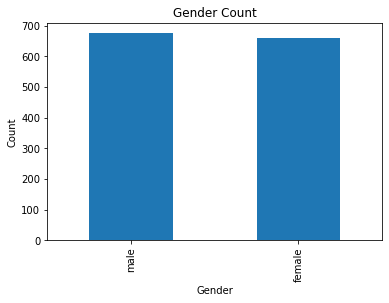

In [5]:
#amount of males vs. females available in the data
gender_count_plot = df['sex'].value_counts().plot(kind='bar')
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

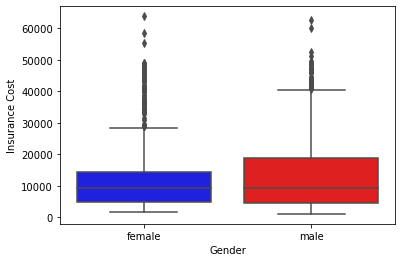

In [6]:
#Formation of a boxplot to analyze quartiles, medians, and outliers.

my_pal = {"male": "red", "female": "blue"} #list of colors for box plots
sns.boxplot(x = 'sex', y = 'charges', data=df, palette = my_pal)
plt.xlabel('Gender')
plt.ylabel('Insurance Cost')
plt.show()

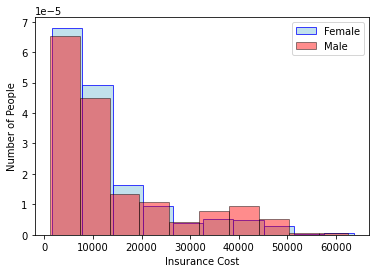

In [7]:
#Formation of histogram to further detail outliers and note the right-handed tail

plt.hist(df.charges[df.sex=='female'], label='Female', density=True, alpha=0.75, color='lightblue', ec='blue')
plt.hist(df.charges[df.sex=='male'], label='Male', density=True, alpha=0.45, color='red',ec='black')
plt.xlabel('Insurance Cost')
plt.ylabel('Number of People')
plt.legend()
plt.show()

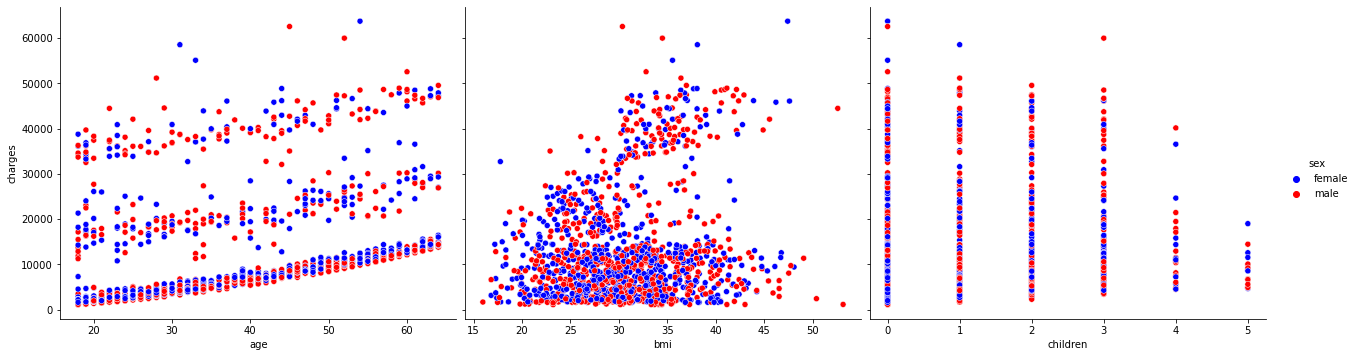

In [8]:
sns.pairplot(df, x_vars = ['age', 'bmi', 'children'], y_vars = ['charges'], hue='sex', height=5, aspect = 1.2, palette = my_pal)

### Analysis of Insurance Cost for Smokers
This section analyzes how smoking impacts the cost of insurance. In this section, a bar plot was created to compare the count of both smokers and non-smokers, a box plot and histogram were created to understand the averages and outliers for both smokers and non-smokers, and a pair plot was created to understand how the other factors in combination with smokers/non-smokers impact insurance costs.

Text(0, 0.5, 'Count')

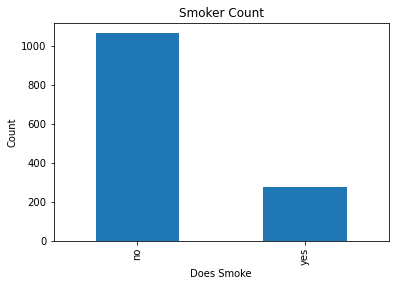

In [9]:
#amount of smokers vs. non-smokers available in the data
smoker_count_plot = df['smoker'].value_counts().plot(kind='bar')
plt.title('Smoker Count')
plt.xlabel('Does Smoke')
plt.ylabel('Count')

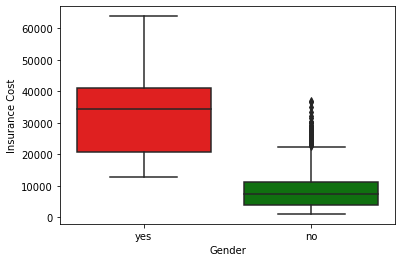

In [10]:
#boxplot of smoker info
my_pal2 = {"yes": "red", "no": "green"} #list of colors for box plots
sns.boxplot(x = 'smoker', y = 'charges', data=df, palette = my_pal2)
plt.xlabel('Gender')
plt.ylabel('Insurance Cost')
plt.show()

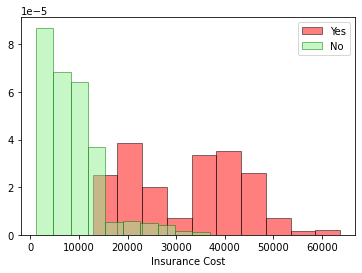

In [11]:
plt.hist(df.charges[df.smoker=='yes'], label='Yes', density=True, alpha=0.5, color='red', ec='black')
plt.hist(df.charges[df.smoker=='no'], label='No', density=True, alpha=0.5, color='lightgreen',ec='green')
plt.xlabel('Insurance Cost')
plt.legend()
plt.show()

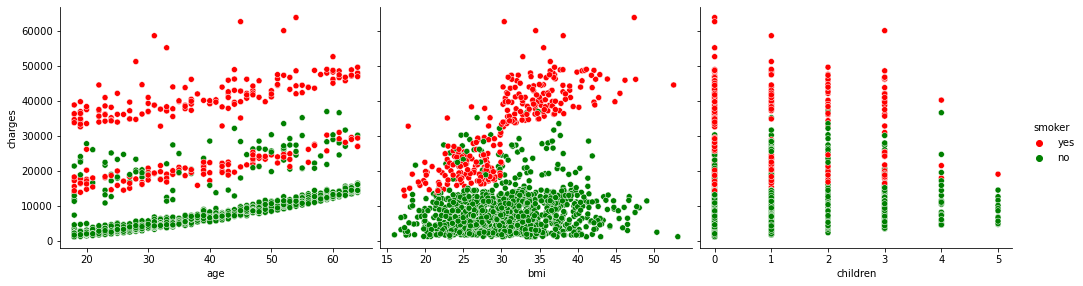

In [12]:
sns.pairplot(df, x_vars = ['age', 'bmi', 'children'], y_vars = ['charges'], hue='smoker', height=4, aspect = 1.2, palette=my_pal2)
plt.show()

### Analysis of Insurance Cost for Region
This section analyzes how region impacts the cost of insurance. In this section of the project, a bar plot was created to compare the count of all four regions, a box plot was created to understand the averages and outliers for all four regions, and a pair plot was created to understand how the other factors in combination with region impact insurance prices.

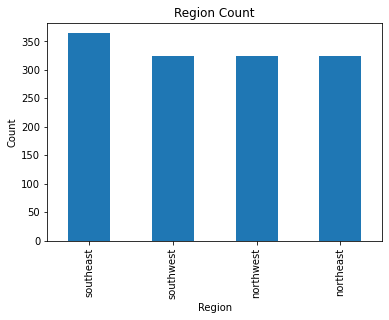

In [13]:
regional_count_plot = df['region'].value_counts().plot(kind='bar')
plt.title('Region Count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

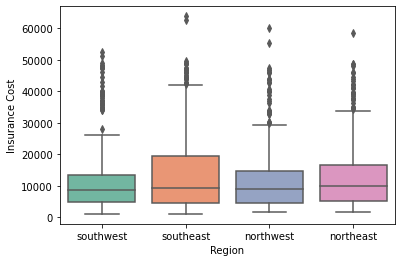

In [14]:
#boxplot of smoker info
sns.boxplot(x = 'region', y = 'charges', data=df, palette = 'Set2')
plt.xlabel('Region')
plt.ylabel('Insurance Cost')
plt.show()

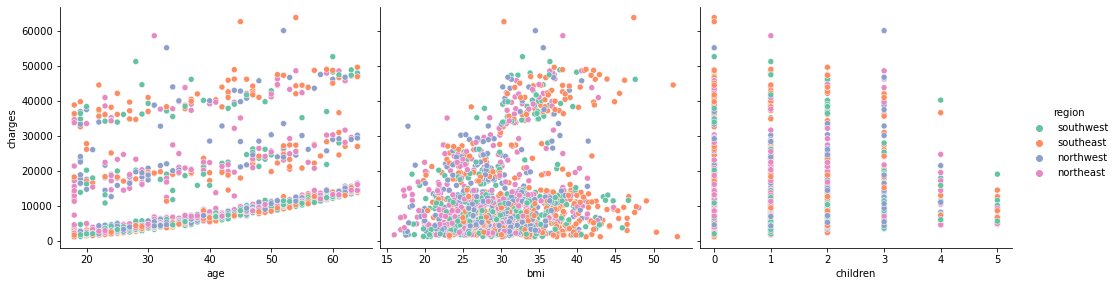

In [15]:
sns.pairplot(df, x_vars = ['age', 'bmi', 'children'], y_vars = ['charges'], hue='region', height=4, aspect = 1.2, palette='Set2')
plt.show()

### Model Fitting and Predicting Insurance

The data was further manipulated such that 'sex','smoker', and 'region,' had quanitiative values. The following five algorithmic models for regression were utilized:

* Linear Regression
* K Nearest Neighbors
* Decision Tree
* Random Forest
* AdaBoost 

The AdaBoost model was found to be the most accurate model and was therefore further analyzed visually for linear trends by plotting the tested insurance cost values with the predicted insurance cost values and then by finding the Mean Absolute Error and Mean Squared Error values for this model. 


In [16]:
# to quanitfy the data for 'sex', 'smoker', and 'region', the data was manipulated such that each category was assigned a numerical value.
df['sex'].replace({'male':0, 'female':1}, inplace=True)
df['smoker'].replace({'no':0, 'yes':1}, inplace=True)
df['region'].replace({'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}, inplace=True)

In [17]:
# print df to ensure that the values were properly input
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [18]:
# split columns to prepare for 80/20 split
X = df.drop(columns='charges')
Y = df['charges']

In [19]:
X.shape, Y.shape

((1338, 6), (1338,))

In [20]:
# 80/20 split of train/test for models
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [22]:
#building all of the models
model_lr = linear_model.LinearRegression() 
model_knn = KNeighborsRegressor(n_neighbors=7)
model_tree = DecisionTreeRegressor()
model_random_forest = RandomForestRegressor()
model_ada = AdaBoostRegressor(n_estimators = 50, learning_rate = .01)

In [23]:
model_lr.fit(X_train, Y_train)
model_knn.fit(X_train, Y_train)
model_tree.fit(X_train, Y_train)
model_random_forest.fit(X_train, Y_train)
model_ada.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.01)

In [24]:
Y_pred_lr = model_lr.predict(X_test)
Y_pred_knn = model_knn.predict(X_test)
Y_pred_tree = model_tree.predict(X_test)
Y_pred_random_forest = model_random_forest.predict(X_test)
Y_pred_ada = model_ada.predict(X_test)

In [25]:
Y_pred_lr.shape

(268,)

In [26]:
#print all of the coeffecient of determinations for each model to see which is most accurate
print('Linear Regression (R^2):', ((r2_score(Y_test, Y_pred_lr))*100),'%')
print('K Nearest Neighbours(R^2):', ((r2_score(Y_test, Y_pred_knn))*100),'%')
print('Decision Tree (R^2):', ((r2_score(Y_test, Y_pred_tree))*100),'%')
print('Random Forest (R^2):', ((r2_score(Y_test, Y_pred_random_forest))*100),'%')
print('AdaBoost (R^2):', ((r2_score(Y_test, Y_pred_ada))*100),'%')

Linear Regression (R^2): 78.24795939728668 %
K Nearest Neighbours(R^2): 12.489365018200282 %
Decision Tree (R^2): 70.08415229932194 %
Random Forest (R^2): 85.89236339060649 %
AdaBoost (R^2): 86.66394075734615 %


Text(0, 0.5, 'Predicted Insurance Costs')

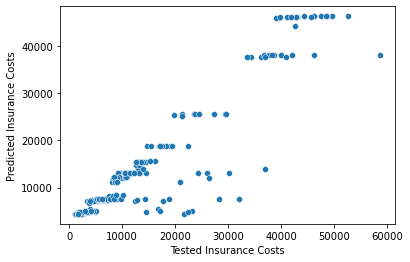

In [27]:
#visually inspect that these values are linear
sns.scatterplot(Y_test, Y_pred_ada)
plt.xlabel('Tested Insurance Costs')
plt.ylabel('Predicted Insurance Costs')

In [28]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [29]:
ada_mae = cross_val_score(model_ada,X_train,Y_train,scoring='neg_mean_absolute_error', cv=cv,n_jobs=-1,error_score='raise')

In [30]:
print('Mean Absolute Error(MAE): %.3f (%.3f)' % (mean(ada_mae), std(ada_mae)))

Mean Absolute Error(MAE): -2922.508 (298.224)


In [31]:
ada_mse = cross_val_score(model_ada,X_train,Y_train,scoring='neg_mean_squared_error', cv=cv,n_jobs=-1,error_score='raise')

In [32]:
print('Mean Squared Error(MSE): %.3f (%.3f)' % (mean(ada_mse), std(ada_mse)))

Mean Squared Error(MSE): -22099345.936 (6145919.843)


In [33]:
# Simple Linear Regression Model for gathering coeffecients
print('Coeffecients:', model_lr.coef_)
print('Intercept:', model_lr.intercept_)
print('Mean Squared Error (MSE):', mean_squared_error(Y_test, Y_pred_lr))
print('Coeffecient of Determination (R^2):', r2_score(Y_test, Y_pred_lr))

Coeffecients: [  253.83101622   239.08523574   344.88011967   328.46789335
 23537.00193491   212.1600531 ]
Intercept: -12913.287401931602
Mean Squared Error (MSE): 36494090.06202184
Coeffecient of Determination (R^2): 0.7824795939728668


### Conclusions:

Based on visualizations, there are no obvious difference in insurance charges based on the sex of the patient or the region in which the patient is from. The biggest indicator for increased insurance charges is whether or not the patient smokes.

While the AdaBoost model is more accurate, we can utilize the linear regression model to make a simple equation to reasonably predict the insurance charges. Utilizing the coefficients and intercept given from the Linear Regression Model, we can predict the insurance costs with the linear equation below to approximately 78% accuracy and a MSE value of approximately 36,000,000. These numbers vary once the program is ran multiple times; however, the initial test yielded the following equation:

* charges = 256.372*age + 150.931*sex + 319.395*bmi + 518.989*children + 23593.569*smoker + 254.553*region - 12440.587 
 
This model verifies what was previously visualized: smoking has the most dramatic increase in the cost of insurance. BMI and number of children then play the most dramatic increase in the cost of insurance, while the sex of the patient is the least important factor. 

### Further Predictions:

Additional models could be utilized to find a more accurate model for predicting the cost of insurance. Other important details to be analyzed could include further medical history which would most likely increase the cost of insurance. 
